# Looking at the statistics of the coal plants in Pakistan and india

In [8]:
import pandas as pd

import matplotlib.pyplot as plt

import geopandas as gpd



In [9]:

def estimate_emissions_from_excel(file_path, sheet_name, countries_column, capacity_column):
    """
    This function reads data from an Excel file, estimates emissions for each pollutant,
    and returns a DataFrame with the original data and additional columns for emissions.

    Args:
        file_path (str): Path to the Excel file containing the data.
        sheet_name (str): Name of the sheet containing the data.
        countries_column (str): Name of the column containing country names.
        capacity_column (str): Name of the column containing capacity data.

    Returns:
        pandas.DataFrame: DataFrame containing the original data and additional columns
                          for emissions of each pollutant.
    """
    # Read data from Excel file
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    # Filter data for specific countries
    countries_list = ["Pakistan", "India", "Bangladesh"]
    if countries_column not in df.columns:
        raise ValueError(f"Column '{countries_column}' not found in the DataFrame.")
    df_igp = df[df[countries_column].isin(countries_list)].copy()

    # Calculate daily production (KW)
    df_igp['daily_production(KW)'] = df_igp[capacity_column] * 24 * 1000 * 365  # Annual production

    # Emission factors (g/kWh)
    avg_NOx = (4.22 + 4.38) / 2
    avg_SO2 = 7.20
    avg_PM10 = (0.29 + 0.45) / 2
    avg_PM25 = (0.16 + 0.22) / 2

    # Convert emissions from grams to tonnes
    df_igp['NOx_tonnes_per_KW/annum'] = df_igp['daily_production(KW)'] * avg_NOx / 1e6
    df_igp['SO2_tonnes_per_KW/annum'] = df_igp['daily_production(KW)'] * avg_SO2 / 1e6
    df_igp['PM10_tonnes_per_KW/annum'] = df_igp['daily_production(KW)'] * avg_PM10 / 1e6
    df_igp['PM25_tonnes_per_KW/annum'] = df_igp['daily_production(KW)'] * avg_PM25 / 1e6

    return df_igp


In [10]:

# you will have to define the path of your own file

file_path = r"D:\ERASMUS\France_Sem3\side projects\APAD_oxford\Global-Coal-Plant-Tracker-July-2023.xlsx"

sheet_name = "Units"  # Update with your sheet name if different

countries_column = "Country"  # Name of the column containing country names

capacity_column = "Capacity (MW)"  # Name of the column containing capacity data

df_with_emissions = estimate_emissions_from_excel(file_path, sheet_name, countries_column, capacity_column)


c:\Users\Khizer Zakir\anaconda3\envs\myenv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df_with_emissions.head()

,GEM unit/phase ID,GEM location ID,Country,Wiki URL,Plant name,Unit name,Plant name (local),Plant name (other),Owner,Parent,...,Emission factor (kg of CO2 per TJ),Capacity factor,Annual CO2 (million tonnes / annum),Lifetime CO2,Remaining plant lifetime (years),daily_production(KW),NOx_tonnes_per_KW/annum,SO2_tonnes_per_KW/annum,PM10_tonnes_per_KW/annum,PM25_tonnes_per_KW/annum
148,G112681,L100059,Bangladesh,https://www.gem.wiki/Banshkhali_power_station_...,Banshkhali power station (Beximco),NaN,NaN,NaN,Power Construction Corporation of China Ltd,Power Construction Corporation of China Ltd,...,96100,0.53,2.7,106.9,40,5.781600e+09,24860.88,41627.52,2139.192,1098.504
149,G101511,L100060,Bangladesh,https://www.gem.wiki/Banshkhali_power_station_...,Banshkhali power station (S Alam),Unit 1,NaN,"Banskhali S. Alam power station, Chattogram po...",S Alam Group [70.0%]; Shandong Electric Power ...,S Alam Group [70.0%]; Shandong Electric Power ...,...,96100,0.53,2.6,104.5,40,5.781600e+09,24860.88,41627.52,2139.192,1098.504
150,G101512,L100060,Bangladesh,https://www.gem.wiki/Banshkhali_power_station_...,Banshkhali power station (S Alam),Unit 2,NaN,"Banskhali S. Alam power station, Chattogram po...",S Alam Group [70.0%]; Shandong Electric Power ...,S Alam Group [70.0%]; Shandong Electric Power ...,...,96100,0.53,2.6,104.5,40,5.781600e+09,24860.88,41627.52,2139.192,1098.504
151,G100598,L100079,Bangladesh,https://www.gem.wiki/Barapukuria_power_station,Barapukuria power station,Unit 1,NaN,বড়পুকুরিয়া,Bangladesh Power Development Board,Bangladesh Power Development Board,...,94600,0.53,0.7,15.1,23,1.095000e+09,4708.50,7884.00,405.150,208.050
152,G100599,L100079,Bangladesh,https://www.gem.wiki/Barapukuria_power_station,Barapukuria power station,Unit 2,NaN,বড়পুকুরিয়া,Bangladesh Power Development Board,Bangladesh Power Development Board,...,94600,0.53,0.7,15.1,23,1.095000e+09,4708.50,7884.00,405.150,208.050


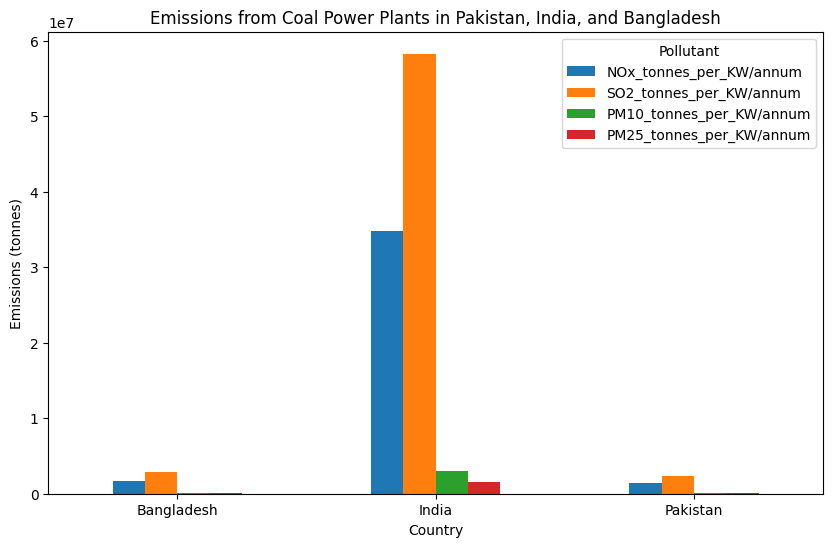

In [11]:
# group by country and plot the emissions
# Group by country and sum the emissions

df_grouped = df_with_emissions.groupby('Country').sum()

# Plot the emissions for each country
df_grouped.plot(kind='bar',
                 y=['NOx_tonnes_per_KW/annum',
                     'SO2_tonnes_per_KW/annum',
                       'PM10_tonnes_per_KW/annum',
                         'PM25_tonnes_per_KW/annum'],
                           figsize=(10, 6))
plt.title('Emissions from Coal Power Plants in Pakistan, India, and Bangladesh')
plt.ylabel('Emissions (tonnes)')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.legend(title='Pollutant')
plt.show()


C:\Users\Khizer Zakir\AppData\Local\Temp\ipykernel_8532\4103894356.py:14: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("coal_power_plants_emissions.shp")


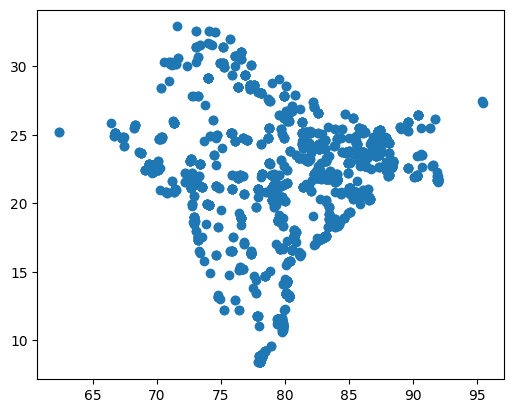

In [12]:
# export as shapefile

# Create a GeoDataFrame from the DataFrame

gdf = gpd.GeoDataFrame(df_with_emissions,
                        geometry=gpd.points_from_xy(df_with_emissions.Longitude,
                                                     df_with_emissions.Latitude)
                                                     )
gdf.crs = "EPSG:4326"
#plot the GeoDataFrame to check if it is correct
gdf.plot()

# Save the GeoDataFrame to a shapefile
gdf.to_file("coal_power_plants_emissions.shp")


In [6]:
import pandas as pd
import geopandas as gpd

def export_shapefile_from_excel(file_path, sheet_name, countries_column, countries_list, output_shapefile):
    """
    Reads an Excel file, filters it based on specified countries, and exports the filtered data as a shapefile.

    Parameters:
        file_path (str): Path to the Excel file.
        sheet_name (str): Name of the sheet in the Excel file.
        countries_column (str): Name of the column containing country names.
        countries_list (list of str): List of countries to filter the data for.
        output_shapefile (str): Path to save the output shapefile.

    Returns:
        GeoDataFrame: Filtered data as a GeoDataFrame.
    """
    # Read data from Excel file
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    # Check if countries_column exists in DataFrame
    if countries_column not in df.columns:
        raise ValueError(f"Column '{countries_column}' not found in the DataFrame.")

    # Filter data for specific countries
    df_filtered = df[df[countries_column].isin(countries_list)].copy()

    # Create a GeoDataFrame from the DataFrame
    gdf = gpd.GeoDataFrame(df_filtered,
                            geometry=gpd.points_from_xy(df_filtered.Longitude, df_filtered.Latitude))
    gdf.crs = "EPSG:4326"  # Set the CRS to WGS84
    gdf.plot()

    # Save the GeoDataFrame to a shapefile
    gdf.to_file(output_shapefile)

    return gdf


C:\Users\Khizer Zakir\AppData\Local\Temp\ipykernel_8532\335873547.py:35: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_shapefile)


,S.No,plant name,full_address,city,country,Organization_Subcity,Organization_City,iso3,region,sub_region,...,sbert_results,sbert_LEI,sbert_PERMID_ID,sbert_HeadquartersAddress,sbert_OrganizationPrimaryQuote,Quote_Name,Quote_PERMID_ID,Quote_hasExchangeCode,Quote_hasExchangeTicker,geometry
78,38,Sonali Paper and Board Mills Ltd,"Rajuk Bhaban, Rajuk Avenue, Dhaka 1000, Bangla...",DHAKA,BANGLADESH,DHAKA,BANGLADESH,BGD,Asia,South Asia,...,"[('Sonali Paper and Board Mills Ltd', 1.0)]",NaN,4.295941e+09,"51, Central Road\nDhanmondi\nDHAKA\n1205\nBang...",https://permid.org/1-55838855105,SONALI PAPER ORD,5.583886e+10,DSE,SONALIPAPR,POINT (90.41589 23.72633)
79,266,"Hussain Pulp, Paper and Board Mills Ltd","Tejgaon Industrial Area, Dhaka 1208, Bangladesh",DHAKA,BANGLADESH,DHAKA,BANGLADESH,BGD,Asia,South Asia,...,"[('HUSSAIN PULP & PAPER MILLS LTD', 0.97764372...",NaN,4.296781e+09,Bangladesh\n,NaN,NaN,NaN,NaN,NaN,POINT (90.40545 23.76573)
80,632,"Hussain Pulp, Paper and Board Mills Ltd, Enaye...","Narayanganj 1400, Bangladesh",NARAYANGANJ,BANGLADESH,NARAYANGANJ,BANGLADESH,BGD,Asia,South Asia,...,"[('HUSSAIN PULP & PAPER MILLS LTD', 0.86933821...",NaN,4.296781e+09,Bangladesh\n,NaN,NaN,NaN,NaN,NaN,POINT (90.49561 23.61008)
81,658,"Karnaphuli Paper Mills Ltd, BCIC Bangladesh Ch...","92 Strand Road, Chittagong, Bangladesh",CHITTAGONG,BANGLADESH,CHITTAGONG,BANGLADESH,BGD,Asia,South Asia,...,"[('KARNAPHULI PAPER MILLS LTD', 0.861276745796...",NaN,4.296056e+09,Bangladesh\n,NaN,NaN,NaN,NaN,NaN,POINT (91.81755 22.32149)
82,693,NBPM North Bengal Paper Mills Ltd,"North Bengal Paper Mills, Ishurdi 6620, Bangla...",PAKSEY,BANGLADESH,PAKSEY,BANGLADESH,BGD,Asia,South Asia,...,"[('North Bengal Paper Mills', 0.84794795513153...",NaN,5.000959e+09,Bangladesh\n,NaN,NaN,NaN,NaN,NaN,POINT (89.05197 24.08081)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,2855,Karachi Paper and Board Mills,"R5V3+83R, Shah Muhammad Rd, Sector 27 Landhi T...",Karachi Paper & Board Mills (Pvt) Limited,PAKISTAN,NaN,NaN,PAK,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (67.15272 24.84334)
3251,2856,Lucky Paper Mill,"973G+H34, Kotri, Jamshoro, Sindh, Pakistan",Lucky Paper Mill,PAKISTAN,NaN,NaN,PAK,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (68.27509 25.35425)
3252,2857,"Bin Qasim Packages Ltd, Karachi Corrugating Unit","6 6, 1, Sector 28 Landhi Town, Karachi, Karach...",KARACHI,PAKISTAN,NaN,NaN,PAK,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (67.17163 24.84639)
3253,2859,Pioneer Board,"24 Km Multan Rd, Lahore, Punjab, Pakistan",LAHORE,PAKISTAN,NaN,NaN,PAK,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (74.14581 31.39628)


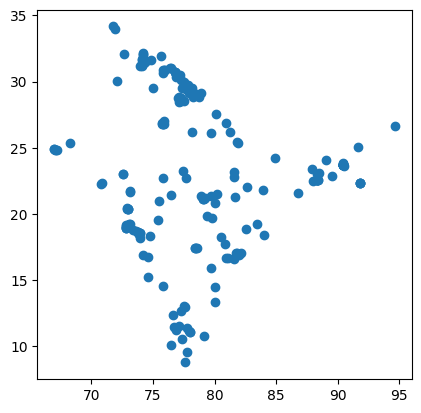

In [7]:
# Read the Excel file
file_path = r"D:\ERASMUS\France_Sem3\side projects\APAD_oxford\Climate_Trace\paper_and_pulp.xlsx"

sheet_name = "Sheet1"  # Update with your sheet name if different

countries_column = "country"
countries_list = ["PAKISTAN", "INDIA", "BANGLADESH"]
output_shapefile = "paper_pulp.shp"

export_shapefile_from_excel(file_path, sheet_name, countries_column, countries_list, output_shapefile)
